Вспомогательные функции, библиотеки

In [1]:
from math import log10 as lg, floor
from tabulate import tabulate
import matplotlib.pyplot as plt

# Лабораторная работа 1
*Сыромятников Дмитрий (КН-401)*

Вариант $13$ (темп роста объема реализации продукции 100 предприятий, производящих стройматериалы)

In [1]:
sample = sample = [
    100.0, 110.5, 75.2, 115.0, 90.5, 98.0, 100.0, 107.0, 92.0, 92.5,
    88.8, 110.2, 71.5, 115.0, 115.0, 115.0, 121.8, 122.0, 107.0, 105.0,
    91.4, 107.0, 92.0, 87.8, 88.1, 110.0, 110.0, 107.0, 102.0, 92.0,
    107.0, 95.8, 100.0, 102.0, 102.0, 96.5, 110.0, 107.0, 102.0, 101.9,
    105.0, 107.0, 81.3, 84.1, 102.0, 101.9, 105.0, 102.0, 100.0, 105.2,
    87.0, 72.2, 74.1, 120.0, 91.5, 107.0, 97.6, 87.0, 100.0, 91.0,
    98.1, 100.0, 80.2, 115.0, 81.3, 100.0, 102.0, 107.0, 107.0, 107.0,
    98.0, 107.0, 103.2, 115.0, 127.4, 102.0, 115.0, 81.2, 103.3, 102.4,
    113.3, 96.6, 102.0, 102.0, 92.0, 91.1, 107.0, 102.1, 102.0, 89.0,
    105.0, 100.0, 83.2, 97.5, 107.1, 76.0, 122.0, 100.0, 98.0, 111.5
]

# 1

По выборке *sample* объемом $n=100$ построить интервальный вариационный ряд

In [3]:
n = len(sample)

## Вычисление отрезка $[a,b]$, на котором лежат все элементы выборки

In [4]:
a, b = min(sample), max(sample)

## Расчет числа полуинтервалов $k$, на которые нужно разбить $[a,b]$
Вычисляем по [формуле Стёрджеса](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A1%D1%82%D1%91%D1%80%D0%B4%D0%B6%D0%B5%D1%81%D0%B0)

$$
k = 1 + \lfloor 3.322lg(n) \rfloor
$$

In [5]:
k = 1 + floor(3.322 * lg(n))

## Расчет длины $h$ частичных полуинтервалов

Для этого находим размах выборки $R$

In [6]:
R = b - a

и вычисляем длину частичных полуинтервалов $h$ по формуле:

$$
h = \frac{R}{k}
$$

In [7]:
h = R / k

## Разбитие отрезка $[a,b]$ на полуинтервалы длины $h$

Разбиваем отрезок $[a, b]$ на вычисленные полуинтервалы естественным образом со смещением самого левого интервала на $\frac{h}{2}$ влево от $a$ и увеличением числа интервалов на 1 (интервалов станет на 1 больше, чем $k$)

In [8]:
start = a - h/2
k_ = k + 1
intervals = set((start + h * i, start + h * (i + 1)) for i in range(k_))

## Расчет числа элементов выборки *sample*, принадлежащих каждому частичному интервалу
Ставим каждому найденному частичному интервалу в множестве частичных интервалов *intervals* в соответствие число элементов выборки, которые попадают в рассматриваемый частичный интервал. Получим отображение из множества частичных интервалов в число элементов выборки на этих интервалах *frequencies*

In [9]:
frequencies = {}

for interval in intervals:
    frequencies[interval] = sum(1 for element in sample if interval[0] <= element < interval[1])

## Получение интервального вариационного ряда выборки *sample*
Упорядочим полученные пары $frequencies$ в естественном для интервалов порядке

In [10]:
gfd = sorted(frequencies.items(), key=lambda item: item[0][0])

Выпишем полученный интервальный вариационный ряд *[gfd](https://thirdspacelearning.com/gcse-maths/statistics/grouped-frequency-table/)* выборки sample в виде таблицы *gfdt*. Значения на концах частичных интервалов округлим до 2 знаков после запятой

In [11]:
gfdt = [(f"({start:.2f}, {end:.2f})", freq) for (start, end), freq in gfd]
print(tabulate(gfdt, headers=["Interval", "Frequency"], tablefmt="github"))

| Interval         |   Frequency |
|------------------|-------------|
| (99.87, 100.53)  |           3 |
| (100.53, 101.19) |           6 |
| (101.19, 101.84) |           6 |
| (101.84, 102.50) |          10 |
| (102.50, 103.16) |          29 |
| (103.16, 103.81) |          28 |
| (103.81, 104.47) |           7 |
| (104.47, 105.13) |          11 |


# 2

Вычислить частоты, частости попадания данных в частичные интервалы, накопленные частоты и частости, аналог плотности распределения.

## Вычисление частот

При построении интервального вариационного ряда заодно получили искомые частоты *frequencies* для каждого найденного интервального ряда. Их можно увидеть в таблице *gfdt* выше

## Вычисление частостей попадания данных в частичные интервалы

Обозначим $n_i$ частоту, соответствующею $i$-му рассматриваемому частичному интервалу. Тогда искомая частость $\hat{p}_i$ для $i$-го частичного интервала вычисляются по формуле:

$$
\hat{p}_i = \frac{n_i}{n}
$$

Вычислим искомые частости *rel_frequencies* по формуле для каждого частичного интервала

In [12]:
rel_frequencies = { interval: frequency / n for interval, frequency in gfd}

Выпишем полученные частости для каждого частичного интервала в виде таблицы *rel_frequencies_table*, упорядочив строки таблицы в порядке следования соответвующих частичных интервалов. Значения на концах частичных интервалов округлим до 2 знаков после запятой

In [13]:
rel_frequencies_table = [(f"({start:.2f}, {end:.2f})", rel_freq) for (start, end), rel_freq in rel_frequencies.items()]
print(tabulate(rel_frequencies_table, headers=["Interval", "Relative frequency"], tablefmt="github"))

| Interval         |   Relative frequency |
|------------------|----------------------|
| (99.87, 100.53)  |                 0.03 |
| (100.53, 101.19) |                 0.06 |
| (101.19, 101.84) |                 0.06 |
| (101.84, 102.50) |                 0.1  |
| (102.50, 103.16) |                 0.29 |
| (103.16, 103.81) |                 0.28 |
| (103.81, 104.47) |                 0.07 |
| (104.47, 105.13) |                 0.11 |


## Вычисление накопленных частот

Для вычисления накопленных частот для каждого частичного интервала воспользуемся рекурентным определением накопительной частоты (естественно обобщается до работы с частичными интервалами)

Рекурентное определение накопительной частоты:

>Упорядочим варианты выборки по возрастанию. *Накопительная частота* $n_{x_0}$ варианта $x_0$ совпадает с его частотой $n_0$. *Накопительная частота* $n_{x_i}$ варианта $x_i$ вычисляется по формуле
>
>$$
n_{x_i} = n_{x_{i-1}} + n_i
$$
>
>где $n_i$ - частота варианта $x_i$

Вычислим накопленные частоты *acc_frequencies* для каждого интервала, воспользовавшись формулой из рекурентного определения

In [14]:
acc_frequencies = {gfd[0][0] : gfd[0][1]}
for i in range(1, len(gfd)):
    previous_interval = gfd[i-1][0]
    interval = gfd[i][0]
    frequency = gfd[i][1]
    acc_frequencies[interval] = acc_frequencies[previous_interval] + frequency

Выпишем полученные накопленные частоты для каждого частичного интервала в виде таблицы *acc_frequencies_table*, упорядочив строки таблицы в порядке следования соответствующих частичных интервалов. Значения на концах частичных интервалов округлим до 2 знаков после запятой

In [15]:
acc_frequencies_table = [(f"({start:.2f}, {end:.2f})", rel_freq) for (start, end), rel_freq in acc_frequencies.items()]
print(tabulate(acc_frequencies_table, headers=["Interval", "Accumulative frequency"], tablefmt="github"))

| Interval         |   Accumulative frequency |
|------------------|--------------------------|
| (99.87, 100.53)  |                        3 |
| (100.53, 101.19) |                        9 |
| (101.19, 101.84) |                       15 |
| (101.84, 102.50) |                       25 |
| (102.50, 103.16) |                       54 |
| (103.16, 103.81) |                       82 |
| (103.81, 104.47) |                       89 |
| (104.47, 105.13) |                      100 |


## Вычисление накопленных частостей

Для вычисления накопленных частотей для каждого частичного интервала воспользуемся формулой из определения относительной накопительной частоты (естественно обобщается до работы с частичными интервалами)

Определение относительной накопительной частоты (накопленной частости)

>Пусть в выборке объема $n$ рассчитана накопительная частота $n_{x_i}$. Тогда относительной накопительной частотой называется величина $\hat{p}_{x_i}$

$$
\hat{p}_{x_i} = \frac{n_{x_i}}{n}
$$

Вычислим накопленные частости *rel_acc_frequencies* для каждого интервала, воспользовавшись формулой из определения

In [16]:
rel_acc_frequencies = {interval: acc_frequency / n for interval, acc_frequency in acc_frequencies.items()}

Выпишем полученные накопленные частости для каждого частичного интервала в виде таблицы *rel_acc_frequencies_table*, упорядочив строки таблицы в порядке следования соответствующих частичных интервалов. Значения на концах частичных интервалов округлим до 2 знаков после запятой

In [17]:
rel_acc_frequencies_table = [(f"({start:.2f}, {end:.2f})", rel_acc_freq) for (start, end), rel_acc_freq in rel_acc_frequencies.items()]
print(tabulate(rel_acc_frequencies_table, headers=["Interval", "Relative accumulative frequency"], tablefmt="github"))

| Interval         |   Relative accumulative frequency |
|------------------|-----------------------------------|
| (99.87, 100.53)  |                              0.03 |
| (100.53, 101.19) |                              0.09 |
| (101.19, 101.84) |                              0.15 |
| (101.84, 102.50) |                              0.25 |
| (102.50, 103.16) |                              0.54 |
| (103.16, 103.81) |                              0.82 |
| (103.81, 104.47) |                              0.89 |
| (104.47, 105.13) |                              1    |


## Вычисление аналога функции плотности распределения
Для вычисления аналога функции плотности распределения [pdf](https://en.wikipedia.org/wiki/Probability_density_function) для каждого частичного интервала поделим частость $\hat{p}$ на этом интервале на длину интервала $h$

In [18]:
pdf = {interval: rel_frequency / h for interval, rel_frequency in rel_frequencies.items()}

Выпишем полученные значения аналога функции плотности распределения для каждого частичного интервала в виде таблицы *pdf_table*, упорядочив строки таблицы в порядке следования соответствующих частичных интервалов. Значения на концах частичных интервалов округлим до 2 знаков после запятой, значения аналога функции до 4 знаков после 

In [19]:
pdf_table = [(f"({start:.2f}, {end:.2f})", f"{pdf_value:.4f}") for (start, end), pdf_value in pdf.items()]
print(tabulate(pdf_table, headers=["Interval", "pdf analog value"], tablefmt="github"))

| Interval         |   pdf analog value |
|------------------|--------------------|
| (99.87, 100.53)  |             0.0457 |
| (100.53, 101.19) |             0.0913 |
| (101.19, 101.84) |             0.0913 |
| (101.84, 102.50) |             0.1522 |
| (102.50, 103.16) |             0.4413 |
| (103.16, 103.81) |             0.4261 |
| (103.81, 104.47) |             0.1065 |
| (104.47, 105.13) |             0.1674 |


# 3

Построить графики:

1) Гистограмму частот;
2) Эмпирическую функцию распределения (кумулянту)
3) Эмпирическую плотность распределения.

## Построение гистограммы частот

Для построения гистограммы частот для каждого частичного интервала под номером $i$ вычислим высоту соответвующего прямоугольника $h_i$ на гистограмме по формуле:

$$
h_i = \frac{n_i}{h} 
$$


In [20]:
histogram_data = { interval: frequency / h for interval, frequency in gfd}

И построим гистограмму частоту на основе вычисленных данных *histogram_data*

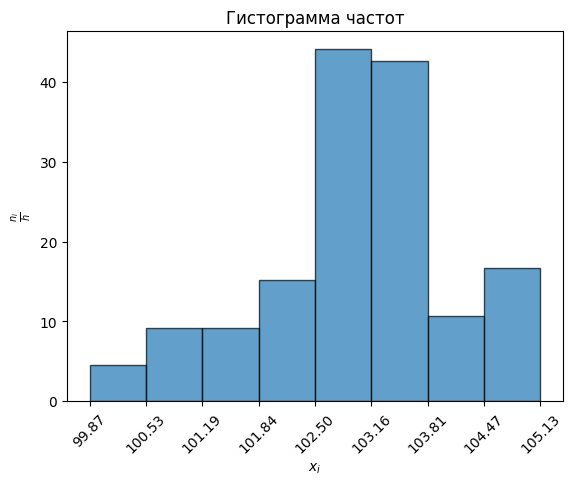

In [21]:
histogram_intervals = list(histogram_data.keys())
histogram_frequencies = list(histogram_data.values())

left_edges = [start for start, _ in histogram_intervals]
right_edges = [end for _, end in histogram_intervals]
widths = [end - start for start, end in histogram_intervals]

plt.bar(left_edges, histogram_frequencies, width=widths, edgecolor='black', align='edge', alpha=0.7)

xticks = sorted(set(left_edges + right_edges))
plt.xticks(xticks, [f"{x:.2f}" for x in xticks], rotation=45)

plt.xlabel('$x_i$')
plt.ylabel('$\\frac{n_i}{h}$')
plt.title('Гистограмма частот')

plt.show()

## Построение графика эмпирической функции распределения (кумулянты)

График эмпирической функции распределения строится по аналогии с гистограммой частот на основе вычисленных накопленных частостей *rel_acc_frequencies*

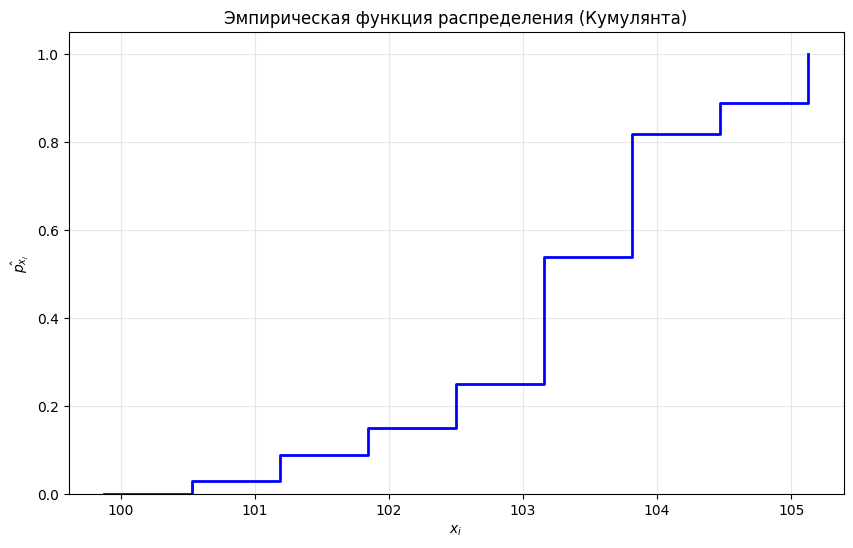

In [22]:
intervals = list(rel_acc_frequencies.keys())
cum_values = list(rel_acc_frequencies.values())

x_step = [interval[0] for interval in intervals] + [intervals[-1][1]]
y_step = [0] + cum_values

plt.figure(figsize=(10, 6))
plt.step(x_step, y_step, where='post', color='b', linewidth=2)
plt.xlabel('$x_i$')
plt.ylabel('$\\hat{p_{x_i}}$')
plt.title('Эмпирическая функция распределения (Кумулянта)')
plt.ylim(0, 1.05) # Добавляем немного места сверху
plt.grid(True, alpha=0.3)
plt.show()

## Построение графика эмпирической плотности распределения

График эмпирической плотности распределения строится по аналогии с гистограммой частот на основе вычисленного аналога функции плотности распределения *pdf*

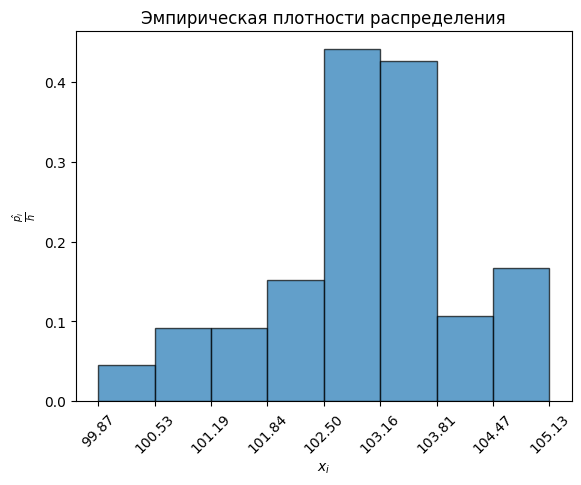

In [23]:
histogram_intervals = list(pdf.keys())
histogram_frequencies = list(pdf.values())

left_edges = [start for start, _ in histogram_intervals]
right_edges = [end for _, end in histogram_intervals]
widths = [end - start for start, end in histogram_intervals]

plt.bar(left_edges, histogram_frequencies, width=widths, edgecolor='black', align='edge', alpha=0.7)

xticks = sorted(set(left_edges + right_edges))
plt.xticks(xticks, [f"{x:.2f}" for x in xticks], rotation=45)

plt.xlabel('$x_i$')
plt.ylabel('$\\frac{\\hat{p_i}}{h}$')
plt.title('Эмпирическая плотности распределения')

plt.show()

# 4

Определить выборочные характеристики распределения:

- выборочное среднее $\hat{X}$
- выборочную дисперсию $\hat{D}$
- выборочное среднее квадратическое отклонение $\hat{\delta}$
- выборочный коэффициент асимметрии $\hat{A}$
- выборочный коэффициент эксцесса $\hat{E}$
- выборочные моду и медиану $\widehat{Mo}$, $\widehat{Me}$
- коэффициент вариации $\hat{V}$

## Вычисление выборочного среднего

Выборочное среднее $\hat{X}$ (*mean*) вычислим по формуле:

$$
\hat{X} = \sum_ix_i \hat{p_i}
$$

Где в качестве $x_i$ возьмем середины соответствующих частичных интервалов

In [24]:
mean = sum((interval[0] + h / 2) * rel_freq for interval, rel_freq in rel_frequencies.items())

Значение выборочного среднего для рассматриваемой выборки

In [25]:
print(mean)

102.97971428571428


## Вычисление выборочной дисперсии

Выборочная дисперсия $\hat{D}$ (*variance*) вычисляется по формуле

$$
\hat{D} = \sum_i \hat{p}_i (x_i - \hat{X})^2
$$

где в качестве $x_i$ берутся середины соответствующих частичных интервалов

In [26]:
variance = sum(rel_freq * ((interval[0] + h/2) - mean)**2  for interval, rel_freq in rel_frequencies.items())

Значение выборочной дисперсии для рассматриваемой выборки

In [27]:
print(variance)

1.2338007346938713


## Вычисление выборочного среднего квадратического отклонения

выборочное среднее квадратическое отклонение (*standard_deviation*) вычисляется по формуле:

$$
\hat{\delta} = \sqrt{\hat{D}}
$$

In [28]:
standard_deviation = variance**0.5

Значение выборочного среднего квадратического отклонения для рассматриваемой выборки

In [29]:
print(standard_deviation)

1.1107658325200103


## Вычисление выборочного коэффициента асимметрии 

Выборочный коэффициент асимметрии (*skewness*) вычисляется по формуле:

$$
\hat{A} = \frac{\sum_i \hat{p_i}(x_i - \hat{X})^3}{\hat{\delta}^3}
$$

где в качестве $x_i$ берутся середины соответствующих частичных интервалов

In [30]:
skewness = sum(rel_freq * ((interval[0] + h/2) - mean)**3  for interval, rel_freq in rel_frequencies.items()) / standard_deviation**3

Значение выборочного коэффициента асимметрии для рассматриваемой выборки

In [31]:
print(skewness)

-0.47492286625756835


## Вычисление выборочного коэффициент эксцесса 

Выборочный коэффициент эксцесса (*kurtosis*) вычисляется по формуле 

$$
\hat{E} = \frac{\sum_i \hat{p_i}(x_i - \hat{X})^4}{\hat{\delta}^4} - 3
$$

где в качестве $x_i$ берутся середины соответствующих частичных интервалов

In [32]:
kurtosis = (sum(rel_freq * ((interval[0] + h/2) - mean)**4  for interval, rel_freq in rel_frequencies.items()) / standard_deviation**4) - 3

Значение выборочного коэффициента эксцесса для рассматриваемой выборки

In [33]:
print(kurtosis)

0.0761210322638406


## Вычисление выборочной моды

Для вычисления выборочной моды найдем модальный интервал (*modal_class*) среди частичных интервалов построенного интервального вариационного ряда *gfd*, частоту на модальном интервале (*n_modal_class*)

In [34]:
modal_class, n_modal_class = max(gfd, key=lambda gfd_elem: gfd_elem[1])

Частоты на частичных интервалах, расположенных непосредственно перед и после модального (*n_prev*, *n_next*)

In [35]:
modal_class_index = gfd.index((modal_class, n_modal_class))
_ , n_prev = gfd[modal_class_index - 1]
_ , n_next = gfd[modal_class_index + 1]

Вычислим выборочную моду (*mode*), воспользовавшись формулой

$$
\widehat{Mo} = x_m + \frac{n_m - n_{m-1}}{(n_m - n_{m-1}) + (n_m - n_{m+1})} \cdot h
$$

где:

- $x_m$ - начало модального интервала выборки
- $n_m$ - частота на соответствующем модальном интервале
- $n_{m-1}$ - частота на частичном интервале, расположенном непосредственно перед модальным
- $n_{m+1}$ - частота на частичном интервале, расположенном непосредственно после модального
- $h$ - размер модального интервала


In [36]:
mode = modal_class[0] + ( (n_modal_class - n_prev) / ( (n_modal_class - n_prev) + (n_modal_class - n_next) ) ) * h

Значение выборочной моды для рассматриваемой выборки

In [37]:
print(mode)

103.12428571428572


## Вычисление выборочной медианы

Для вычисления выборочной медианы найдем медианный интервал (*median_class*) среди всех частичных интервалов и частоту (*median_class_freq*) на этом интервале

In [38]:
median_class, median_class_acc_freq = next((interval, acc_frequency) for (interval, acc_frequency) in acc_frequencies.items() if acc_frequency >= n / 2)
median_class_freq = frequencies[median_class]

Накопительные частоту на частичном интервале, расположенном непосредственно перед медианным (*acc_frec_prev*)

In [39]:
acc_frequencies_list = list(acc_frequencies.items())
median_class_index = acc_frequencies_list.index((median_class, median_class_acc_freq))
_ , acc_frec_prev = acc_frequencies_list[median_class_index - 1]

Вычислим выборочную медиану (*median*), воспользовавшись формулой

$$
\widehat{Me} = x_{Me} + \frac{\frac{n}{2} - n_{Me-1}}{n_{Me}} \cdot h
$$

где:

- $x_{Me}$ - начало медианного интервала
- $n$ -объем выборки
- $n_{Me-1}$ - накопительная частота частичного интервала, расположенного непосредственно перед медианным
- $n_{Me}$ - частота медианного интервала
- $h$ - размер медианного интервала


In [40]:
median = median_class[0] + ( (n/2 - acc_frec_prev) / median_class_freq ) * h

Значение выборочной медианы для рассматриваемой выборки

In [41]:
print(median)

103.06650246305419


## Вычисление коэффициента вариации

Выборочный коэффициент вариации (*coefficient_of_variation*) вычисляется по формуле

$$
\hat{V} = \frac{\hat{\delta}}{\hat{X}}
$$

In [42]:
coefficient_of_variation = standard_deviation / mean

Значение коэффициента вариации для рассматриваемой выборки (в процентах)

In [43]:
print(f'{coefficient_of_variation * 100}%' )

1.0786258635736958%


## Резюме

In [44]:
print(f"Выборочное среднее (X̂): {mean:.4f}")
print(f"Выборочная дисперсия (D̂): {variance:.4f}")
print(f"Выборочное СКО (δ̂): {standard_deviation:.4f}")
print(f"Коэффициент асимметрии (Â): {skewness:.4f}")
print(f"Коэффициент эксцесса (Ê): {kurtosis:.4f}")
print(f"Мода (M̂o): {mode:.4f}")
print(f"Медиана (M̂e): {median:.4f}")
print(f"Коэффициент вариации (V̂): {coefficient_of_variation:.4f} ({coefficient_of_variation*100:.2f}%)")

Выборочное среднее (X̂): 102.9797
Выборочная дисперсия (D̂): 1.2338
Выборочное СКО (δ̂): 1.1108
Коэффициент асимметрии (Â): -0.4749
Коэффициент эксцесса (Ê): 0.0761
Мода (M̂o): 103.1243
Медиана (M̂e): 103.0665
Коэффициент вариации (V̂): 0.0108 (1.08%)


# 5

Исходя из полученных в ходе работы числовых характеристик выборки, охарактеризовать распределение исследуемого признака. Ответить на вопрос: каков смысл полученных характеристик?

## Выборочное среднее ($\hat{X} \approx 99.77$)

**Смысл:** Среднее арифметическое всех значений выборки. Центр распределения, вокруг которого группируются данные.

## Выборочная дисперсия и выборочное среднее квадратическое отклонение

**Смысл:**
- Дисперсия - средний квадрат отклонений значений от среднего
- СКО - средний разброс данных вокруг среднего (в единицах измерения)

**Интерпретация:** Значения признака в среднем отклоняются от среднего на ±11.15 единицы. Разброс характеризуется как умеренный.

## Коэффициент вариации ($\hat{V} \approx 11.17\%$)

**Смысл:** Относительная мера разброса, показывающая долю среднего разброса от среднего значения.

**Интерпретация:** Коэффициент менее 15-20% показывает однородность выборки и надежность среднего значения.

## Коэффициент асимметрии ($\hat{A} \approx -0.62$)

**Смысл:** Характеризует степень скошенности распределения:
- $\hat{A} = 0$: симметричное распределение
- $\hat{A} > 0$: правая скошенность
- $\hat{A} < 0$: левая скошенность

**Интерпретация:** Отрицательное значение указывает на левую скошенность - наличие группы объектов с аномально низкими значениями признака.

## Коэффициент эксцесса ($\hat{E} \approx 0.42$)

**Смысл:** Характеризует островершинность распределения:
- $\hat{E} = 0$: как у нормального распределения
- $\hat{E} > 0$: более островершинное
- $\hat{E} < 0$: более плосковершинное

**Интерпретация:** Положительное значение означает, что распределение более острое в сравнении с нормальным, данные более сконцентрированы вокруг среднего значения.

## Мода и Медиана ($\widehat{Mo} \approx 103.38$, $\widehat{Me} \approx 101.93$)

**Смысл:**
- Мода - наиболее часто встречающееся значение
- Медиана - значение, делящее выборку пополам (слева - меньше медианного значения, справа - больше)

**Интерпретация:** Близость значений моды и медианы свидетельствует о симметричности распределения.

## Общий вывод

Распределение признака характеризуется как:
- С выраженной левой асимметрией
- Более острое в сравнении с нормальным распределением
- С умеренным разбросом данных

## В контексте темпов роста

Средний темп роста (≈99.77%) указывает на незначительное снижение объемов реализации в среднем по предприятиям. Левая асимметрия подразумевает, что большинство предприятий демонстрируют стабильность или умеренный рост (мода ≈103.38%, медиана ≈101.93%), но есть значительная группа предприятий с резким спадом. Положительный эксцесс подтверждает концентрацию темпов вокруг 100-103%, что говорит о предсказуемости для большинства компаний, но требует внимания к "хвостам". Коэффициент вариации (11.17%) подтверждает относительную однородность темпов производства в отразии.